In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
#read the data
df=pd.read_csv('Florida_PM10_20-21.csv')
#display the data summary
df

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2020,AQS,120090007,3,19,ug/m3 SC,18,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
1,01/02/2020,AQS,120090007,3,14,ug/m3 SC,13,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
2,01/03/2020,AQS,120090007,3,16,ug/m3 SC,15,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
3,01/04/2020,AQS,120090007,3,15,ug/m3 SC,14,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
4,01/05/2020,AQS,120090007,3,13,ug/m3 SC,12,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,06/26/2021,AQS,120090007,3,17,ug/m3 SC,16,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
526,06/27/2021,AQS,120090007,3,20,ug/m3 SC,19,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
527,06/28/2021,AQS,120090007,3,18,ug/m3 SC,17,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611
528,06/29/2021,AQS,120090007,3,16,ug/m3 SC,15,Melbourne,1,100,81102,PM10 Total 0-10um STP,37340,"Palm Bay-Melbourne-Titusville, FL",12,Florida,9,Brevard,28.053611,-80.628611


In [10]:

df.loc[300]

Date                                                    11/13/2020
Source                                                         AQS
Site ID                                                  120090007
POC                                                              3
Daily Mean PM10 Concentration                                   18
UNITS                                                     ug/m3 SC
DAILY_AQI_VALUE                                                 17
Site Name                                                Melbourne
DAILY_OBS_COUNT                                                  1
PERCENT_COMPLETE                                               100
AQS_PARAMETER_CODE                                           81102
AQS_PARAMETER_DESC                           PM10 Total 0-10um STP
CBSA_CODE                                                    37340
CBSA_NAME                        Palm Bay-Melbourne-Titusville, FL
STATE_CODE                                                    

In [11]:
# Dropping all the unnecessary columns
df = df.loc[:, df.columns.intersection(['Daily Mean PM10 Concentration','DAILY_AQI_VALUE'])]

In [12]:
df

,Daily Mean PM10 Concentration,DAILY_AQI_VALUE
0,19,18
1,14,13
2,16,15
3,15,14
4,13,12
...,...,...
525,17,16
526,20,19
527,18,17
528,16,15


## Lets visualize the data on a graph

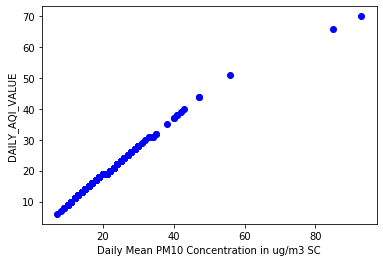

In [13]:
#plot the data
plt.scatter(df['Daily Mean PM10 Concentration'],df['DAILY_AQI_VALUE'],c='b')
plt.xlabel('Daily Mean PM10 Concentration in ug/m3 SC')
plt.ylabel('DAILY_AQI_VALUE')
plt.show()

## Finding the appropriate number of clusters to use

In [17]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,5.300000e+02,5.300000e+02
mean,6.409967e-17,-1.349026e-16
std,1.000945e+00,1.000945e+00
min,-1.481105e+00,-1.658633e+00
25%,-5.532259e-01,-5.850934e-01
50%,-1.555635e-01,-1.250051e-01
75%,3.746530e-01,3.350832e-01
max,9.918550e+00,8.156585e+00


Text(0, 0.5, 'Inertia')

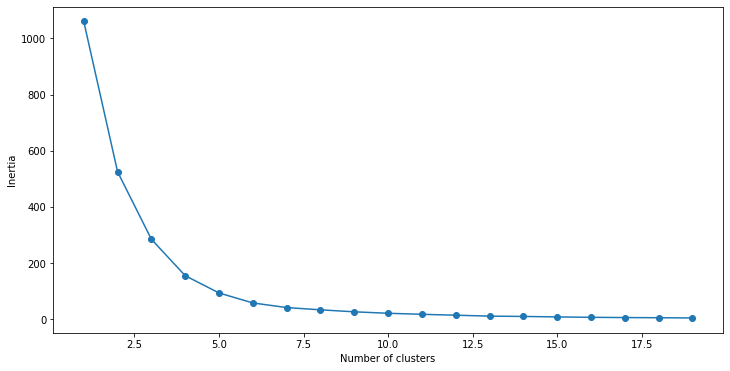

In [19]:
# fitting multiple k-means algorithms and storing the inertia values in an empty list
SSE=[]

for cluster in range(1,20):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster,init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
frame=pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## The graph takes about 4 dots to become constant, therefore we would use 4 clusters

In [32]:
# k means using 4 clusters and k-means++ initialization
kmeans=KMeans(n_jobs=-1,n_clusters=4,init='k-means++')
kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)

In [33]:
frame=pd.DataFrame(data_scaled)
frame['cluster']=pred
frame['cluster'].value_counts()

0    255
3    224
1     48
2      3
Name: cluster, dtype: int64

In [34]:
frame

,0,1,cluster
0,0.109545,0.181720,3
1,-0.553226,-0.585093,0
2,-0.288118,-0.278368,0
3,-0.420672,-0.431731,0
4,-0.685780,-0.738456,0
...,...,...,...
525,-0.155564,-0.125005,3
526,0.242099,0.335083,3
527,-0.023009,0.028358,3
528,-0.288118,-0.278368,0


In [ ]:
centers=kmeans.cluster

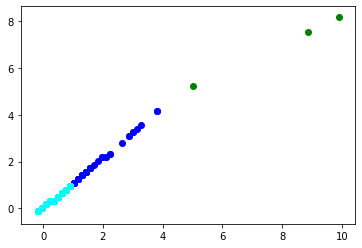

In [35]:
color=['blue','green','cyan','yellow']
# 4 is the number of clusters
for k in range(4):
    data=frame[frame['cluster']==k+1]
    plt.scatter(data[0],data[1],c=color[k])
    plt.scatter

In [37]:
kmeans.cluster_centers_

array([[-0.62756018, -0.67109689],
       [ 1.77751749,  1.91663679],
       [ 7.93023818,  6.98080337],
       [ 0.22730487,  0.25977112]])